# Data Cleaning

Importing the useful libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
#loading the data
train_data = pd.read_csv('credit_train.csv')

In [3]:
train_data.shape


(100514, 19)

In [4]:
#Now take a look at first five rows of our data
train_data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


Now here we can see this data is about different customers who have taken loan from the bank.

Important point to note here is that this data have missing values written as NaN

Firstly we will check how many missing value each column has

In [5]:
train_data.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

So here it looks like there is lot of data that is missing.

Now firstly our objective is make a model to predict loan and we know that first two columns (Loan ID ,Customer ID) play no role in deciding which customer is more eligible to get the loan. Therefore these two columns are of no use therefore we should delte
these columns.

In [6]:
train_data = train_data.drop(['Loan ID', 'Customer ID'], axis=1)

In [7]:
train_data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


Now if we look at the missing values, we can notice that in original data set there are 100514 rows total and among them we can 
say that Credit score, Annual income and Months since last delinquent features are having significant missing values therefore for these columns we will impute the missing values with the average of the column. 

In [8]:
train_data['Credit Score'].fillna(train_data['Credit Score'].mean(), inplace = True)
train_data['Annual Income'].fillna(train_data['Annual Income'].mean(), inplace = True)
train_data['Months since last delinquent'].fillna(train_data['Months since last delinquent'].mean(), inplace = True)

Now we will again look at the missing values remaining.

In [9]:
train_data.isnull().sum()

Loan Status                      514
Current Loan Amount              514
Term                             514
Credit Score                       0
Annual Income                      0
Years in current job            4736
Home Ownership                   514
Purpose                          514
Monthly Debt                     514
Years of Credit History          514
Months since last delinquent       0
Number of Open Accounts          514
Number of Credit Problems        514
Current Credit Balance           514
Maximum Open Credit              516
Bankruptcies                     718
Tax Liens                        524
dtype: int64

Now as we know that we have total 100514 rows in our data set and the features remaing are having very less missing values as compared to the total size of the data. In this case we will delete all the rows which have missing values.

In [10]:
train_data.dropna(inplace=True)

In [11]:
train_data.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

Now we can see that Data have no missing values.

In [12]:
train_data.dtypes

Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

Now as different columns are not numeric type first we have to convert categorical data to numeric. We can see 'Loan status'
'Term','Years in current job', 'Home Ownership','purpose' are categorical data type. 

In [13]:
df1 = pd.get_dummies(train_data['Loan Status'])
train_data = pd.concat([train_data, df1], axis=1).reindex(train_data.index)
train_data.drop('Loan Status', axis=1, inplace=True)

df2 = pd.get_dummies(train_data['Term'])
train_data = pd.concat([train_data, df2], axis=1).reindex(train_data.index)
train_data.drop('Term', axis=1, inplace=True)

df3 = pd.get_dummies(train_data['Years in current job'])
train_data = pd.concat([train_data, df3], axis=1).reindex(train_data.index)
train_data.drop('Years in current job', axis=1, inplace=True)

df4= pd.get_dummies(train_data['Home Ownership'])
train_data = pd.concat([train_data, df4], axis=1).reindex(train_data.index)
train_data.drop('Home Ownership', axis=1, inplace=True)

df5 = pd.get_dummies(train_data['Purpose'])
train_data = pd.concat([train_data, df5], axis=1).reindex(train_data.index)
train_data.drop('Purpose', axis=1, inplace=True)



In [14]:
train_data.dtypes

Current Loan Amount             float64
Credit Score                    float64
Annual Income                   float64
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
Charged Off                       uint8
Fully Paid                        uint8
Long Term                         uint8
Short Term                        uint8
1 year                            uint8
10+ years                         uint8
2 years                           uint8
3 years                           uint8
4 years                           uint8
5 years                           uint8
6 years                           uint8
7 years                           uint8
8 years                           uint8


Now everything has converted to numeric data we can normalise the data.

Now we will normalise the data. Data normalization is used in machine learning to make model training less sensitive to the scale of features. This allows our model to converge to better weights and, in turn, leads to a more accurate model.

In [15]:
from sklearn import preprocessing
normalized_data = preprocessing.normalize(train_data)

In [17]:
normalized_data = pd.DataFrame(normalized_data)

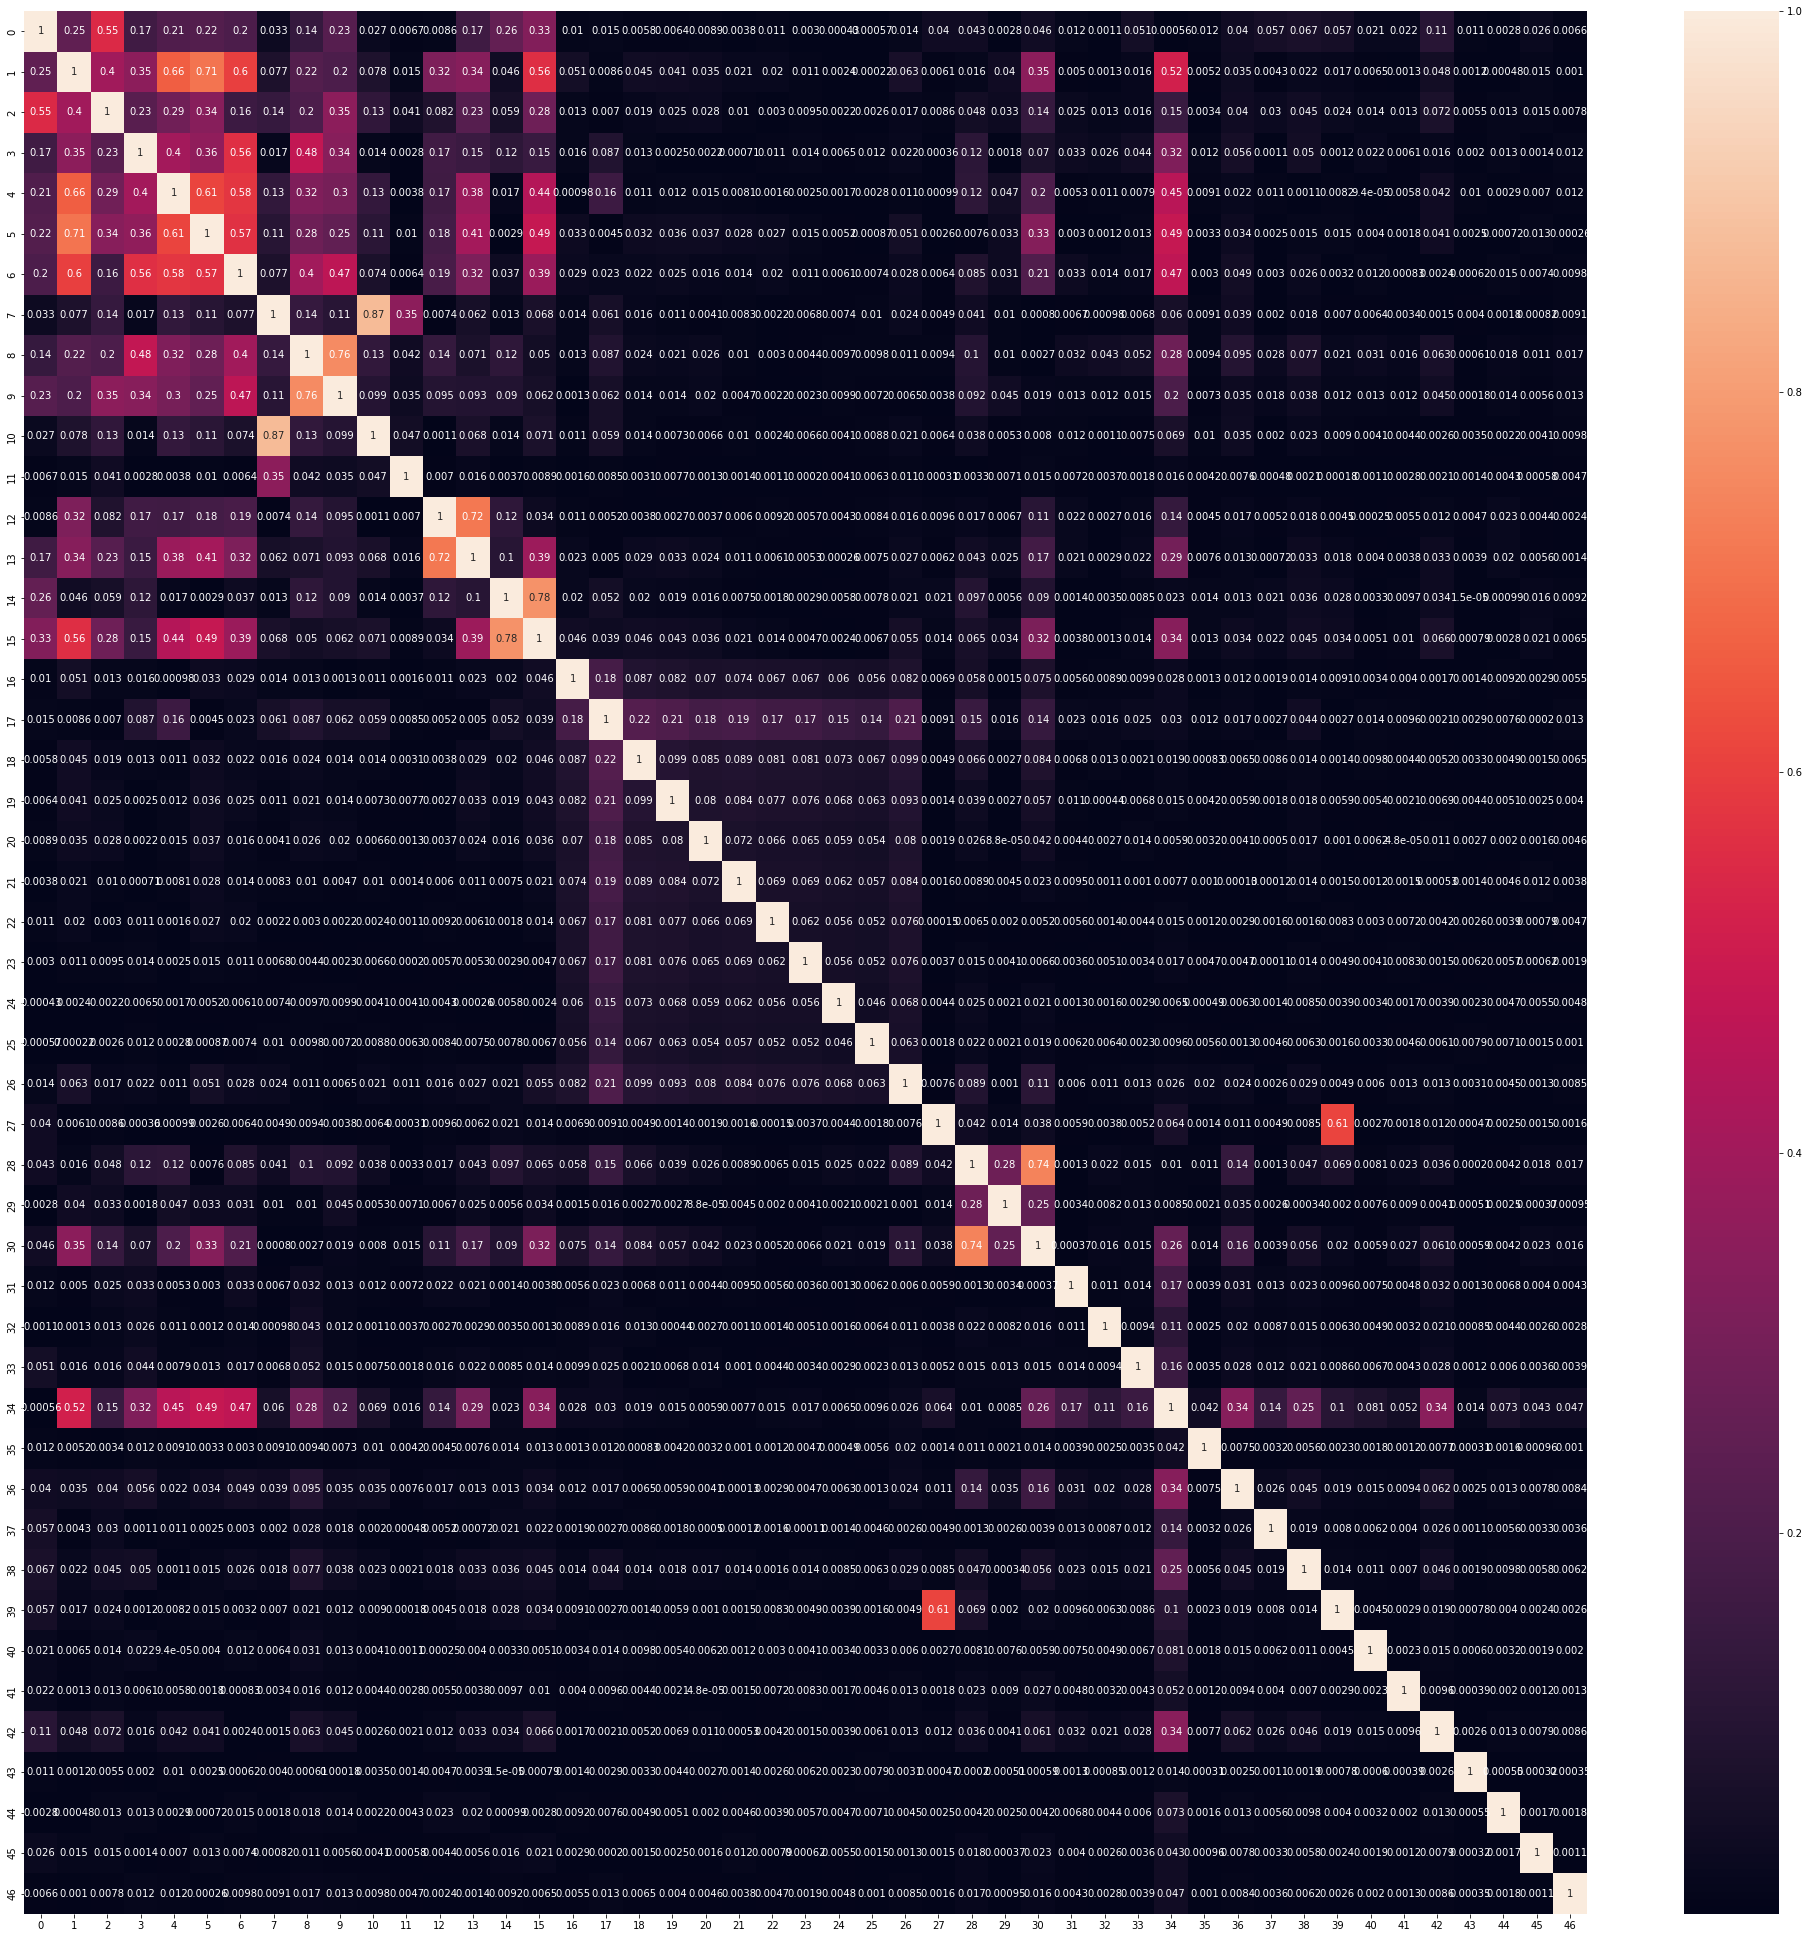

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corrMatrix = normalized_data.corr(method= 'spearman')
fig, ax = plt.subplots(figsize=(35,35))
sns.heatmap(abs(corrMatrix), annot = True)
plt.show()

We can see that not much data is correlated so data cleaning is done!